In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import chdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, classification_report, ConfusionMatrixDisplay, auc

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.cluster  import KMeans
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
#from keras.models import Model
#from keras import backend as K
#from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import time

In [2]:
# Read data and drop redundant column.
import os 
#chdir(os.getcwd())
#data = pd.read_csv('match_history.csv')
#data.head()
cwd = os.getcwd()
cwd = pd.read_csv
data = pd.read_csv("C:\\Users\\libby\\OneDrive\\Desktop\\match_history.csv")
data.head()


date home_team away_team home_team_continent away_team_continent  \
0  2004-09-03     Spain  Scotland              Europe              Europe   
1  2004-09-04   Albania    Greece              Europe              Europe   
2  2004-09-04   Austria   England              Europe              Europe   
3  2004-09-04   Croatia   Hungary              Europe              Europe   
4  2004-09-04   Denmark   Ukraine              Europe              Europe   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                    3                   67                            0   
1                   94                   14                            0   
2                   90                    7                            0   
3                   25                   76                            0   
4                   15                   87                            0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                            0                1  ...         No   
1                            0                2  ...         No   
2                            0                2  ...         No   
3                            0                3  ...         No   
4                            0                1  ...         No   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0             Draw                       94.0                       84.0   
1              Win                        NaN                       90.0   
2             Draw                       83.0                       88.0   
3              Win                       77.0                       74.0   
4             Draw                       82.0                        NaN   

   home_team_mean_defense_score home_team_mean_offense_score  \
0                          86.5                         89.3   
1                           NaN                         59.0   
2                          76.2                         73.0   
3                          80.5                         78.7   
4                          79.5                         85.0   

  home_team_mean_midfield_score  away_team_mean_defense_score  \
0                          89.5                          80.2   
1                          74.5                          82.8   
2                          74.0                          90.5   
3                          79.0                          71.8   
4                          81.5                           NaN   

   away_team_mean_offense_score  away_team_mean_midfield_score  
0                          79.7                           81.8  
1                          83.7                           85.2  
2                          88.7                           91.2  
3                          75.7                           70.2  
4                          81.7                           65.8  

[5 rows x 25 columns]

In [3]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = data.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.home_team_result == 'Win'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100
# Print the results
print ("Total number of matches", n_matches)
print ("Number of features", n_features)
print ("Number of matches won by home team", n_homewins)
print ("Win rate of home team: {:.2f} %".format(win_rate))


Total number of matches 5641
Number of features 24
Number of matches won by home team 2605
Win rate of home team: 46.18 %


In [4]:
#cheching for null values
data.isna().sum()



date                               0
home_team                          0
away_team                          0
home_team_continent                0
away_team_continent                0
home_team_fifa_rank                0
away_team_fifa_rank                0
home_team_total_fifa_points        0
away_team_total_fifa_points        0
home_team_score                    0
away_team_score                    0
tournament                         0
city                               0
country                            0
neutral_location                   0
shoot_out                          0
home_team_result                   0
home_team_goalkeeper_score       327
away_team_goalkeeper_score       400
home_team_mean_defense_score     325
home_team_mean_offense_score     151
home_team_mean_midfield_score    223
away_team_mean_defense_score     376
away_team_mean_offense_score     182
away_team_mean_midfield_score    259
dtype: int64

In [5]:
#data type
data.dtypes

#object type data need to be turned to strings

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [6]:
strings =['date', 'home_team','away_team','home_team_continent', 'away_team_continent',
       'tournament', 'city' , 'country', 'neutral_location', 'shoot_out', 'home_team_result']
num = ['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 
       'home_team_score', 'away_team_score', 'home_team_goalkeeper_score', 
       'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 
       'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score']
for s in strings:
    data[s] = data[s].astype(str)
    
for n in num:
    
    data[n] = data[n].astype(float)
data.head()

date home_team away_team home_team_continent away_team_continent  \
0  2004-09-03     Spain  Scotland              Europe              Europe   
1  2004-09-04   Albania    Greece              Europe              Europe   
2  2004-09-04   Austria   England              Europe              Europe   
3  2004-09-04   Croatia   Hungary              Europe              Europe   
4  2004-09-04   Denmark   Ukraine              Europe              Europe   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                  3.0                 67.0                          0.0   
1                 94.0                 14.0                          0.0   
2                 90.0                  7.0                          0.0   
3                 25.0                 76.0                          0.0   
4                 15.0                 87.0                          0.0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                          0.0              1.0  ...         No   
1                          0.0              2.0  ...         No   
2                          0.0              2.0  ...         No   
3                          0.0              3.0  ...         No   
4                          0.0              1.0  ...         No   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0             Draw                       94.0                       84.0   
1              Win                        NaN                       90.0   
2             Draw                       83.0                       88.0   
3              Win                       77.0                       74.0   
4             Draw                       82.0                        NaN   

  home_team_mean_defense_score home_team_mean_offense_score  \
0                         86.5                         89.3   
1                          NaN                         59.0   
2                         76.2                         73.0   
3                         80.5                         78.7   
4                         79.5                         85.0   

  home_team_mean_midfield_score  away_team_mean_defense_score  \
0                          89.5                          80.2   
1                          74.5                          82.8   
2                          74.0                          90.5   
3                          79.0                          71.8   
4                          81.5                           NaN   

   away_team_mean_offense_score  away_team_mean_midfield_score  
0                          79.7                           81.8  
1                          83.7                           85.2  
2                          88.7                           91.2  
3                          75.7                           70.2  
4                          81.7                           65.8  

[5 rows x 25 columns]

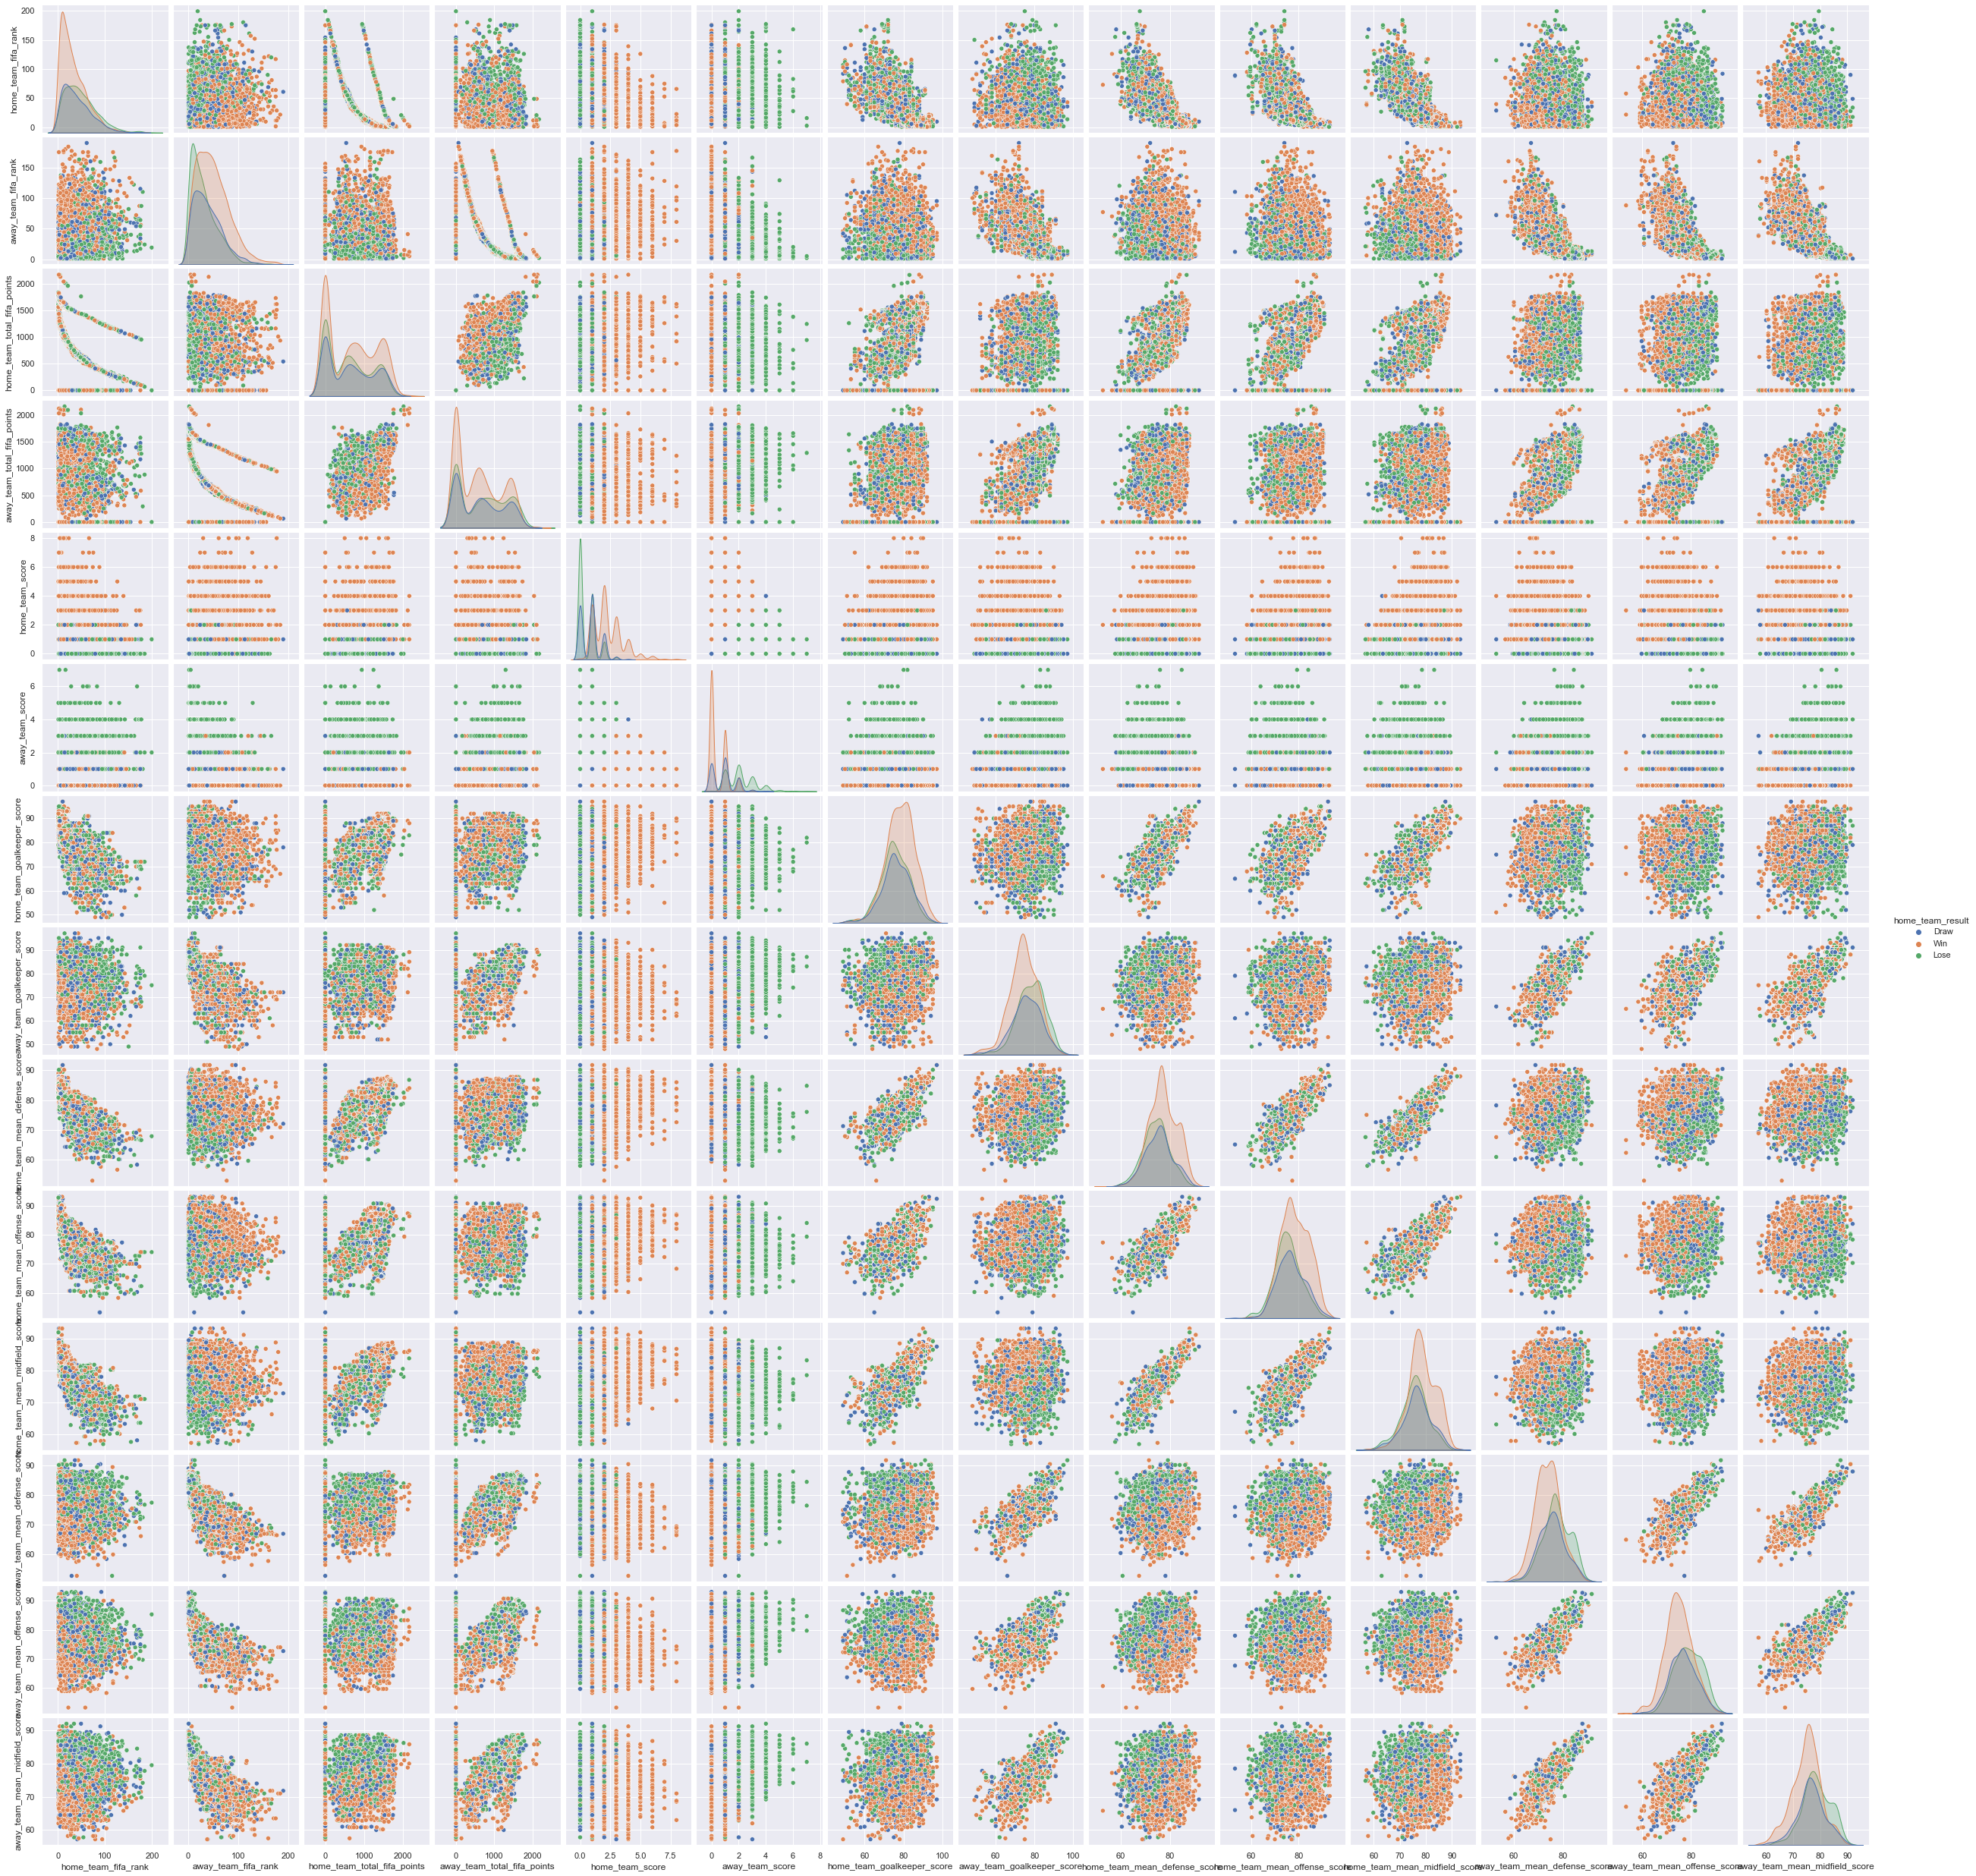

In [7]:
g = sns.pairplot(data[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 
       'home_team_score', 'away_team_score', 'home_team_goalkeeper_score', 
       'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 
       'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score', 'home_team_result']], hue = 'home_team_result')

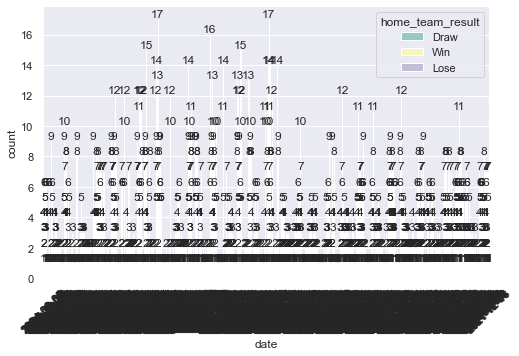

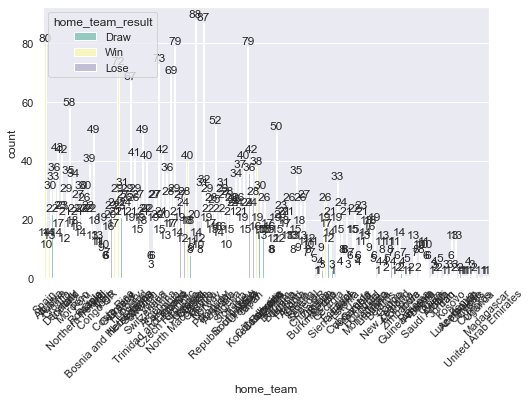

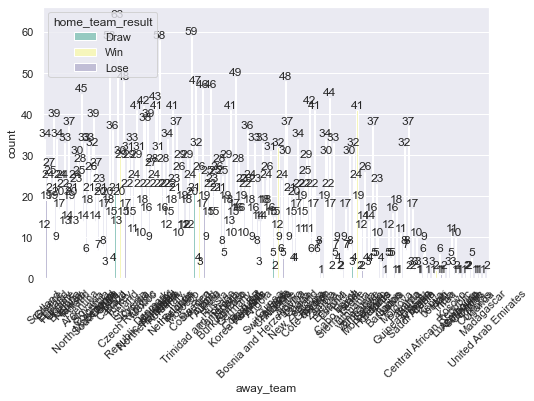

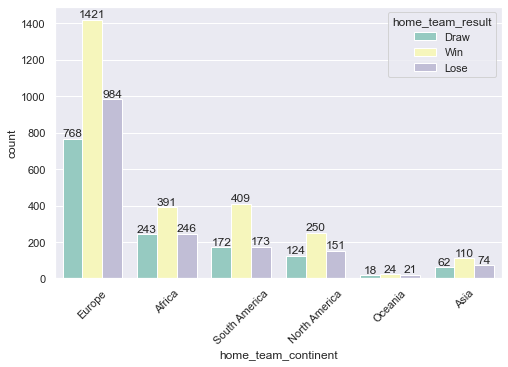

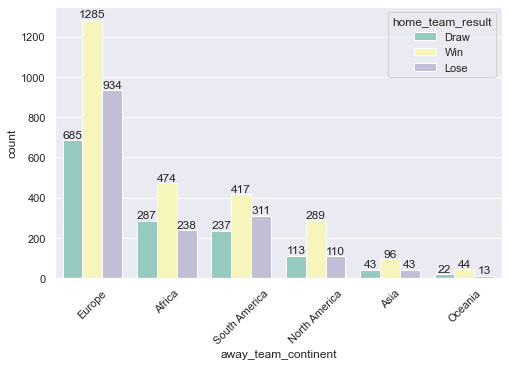

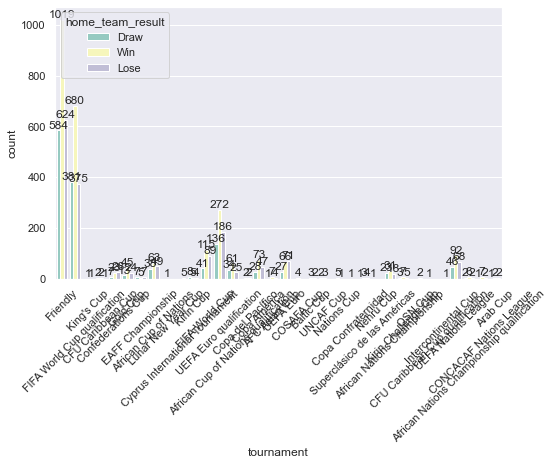

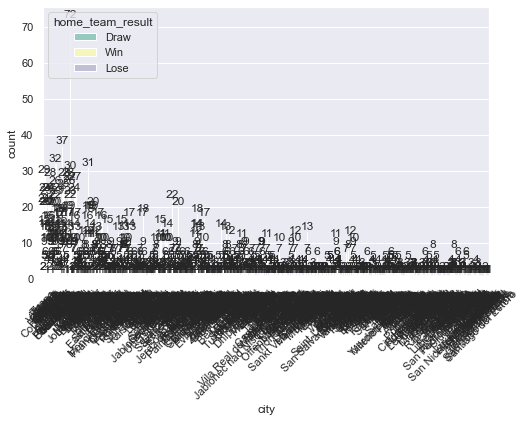

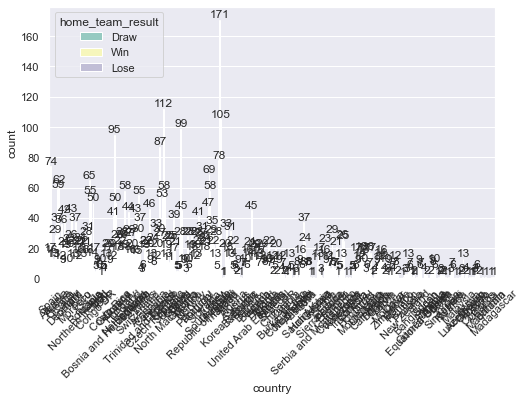

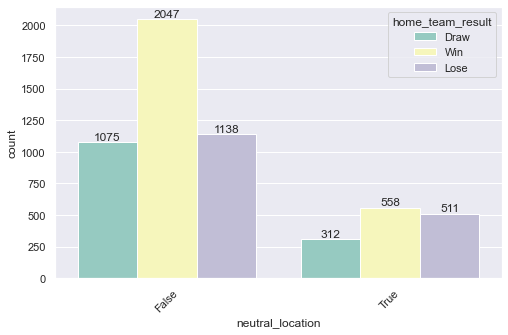

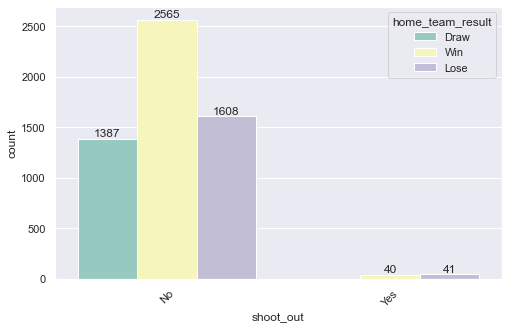

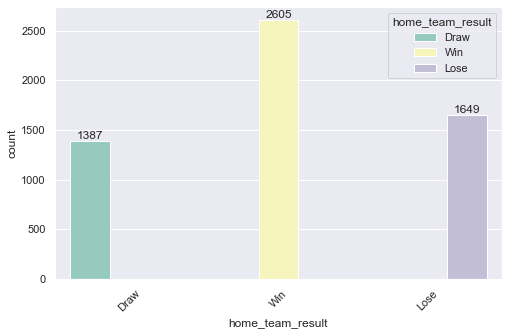

In [8]:
categories = ['date', 'home_team','away_team','home_team_continent', 'away_team_continent',
       'tournament', 'city' , 'country', 'neutral_location', 'shoot_out', 'home_team_result']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for f in categories:
    ax = sns.countplot(x = f, data = data, palette = 'Set3', hue = 'home_team_result')
    for container in ax.containers:
        ax.bar_label(container)
    plt.xticks(rotation=45)
    plt.show()

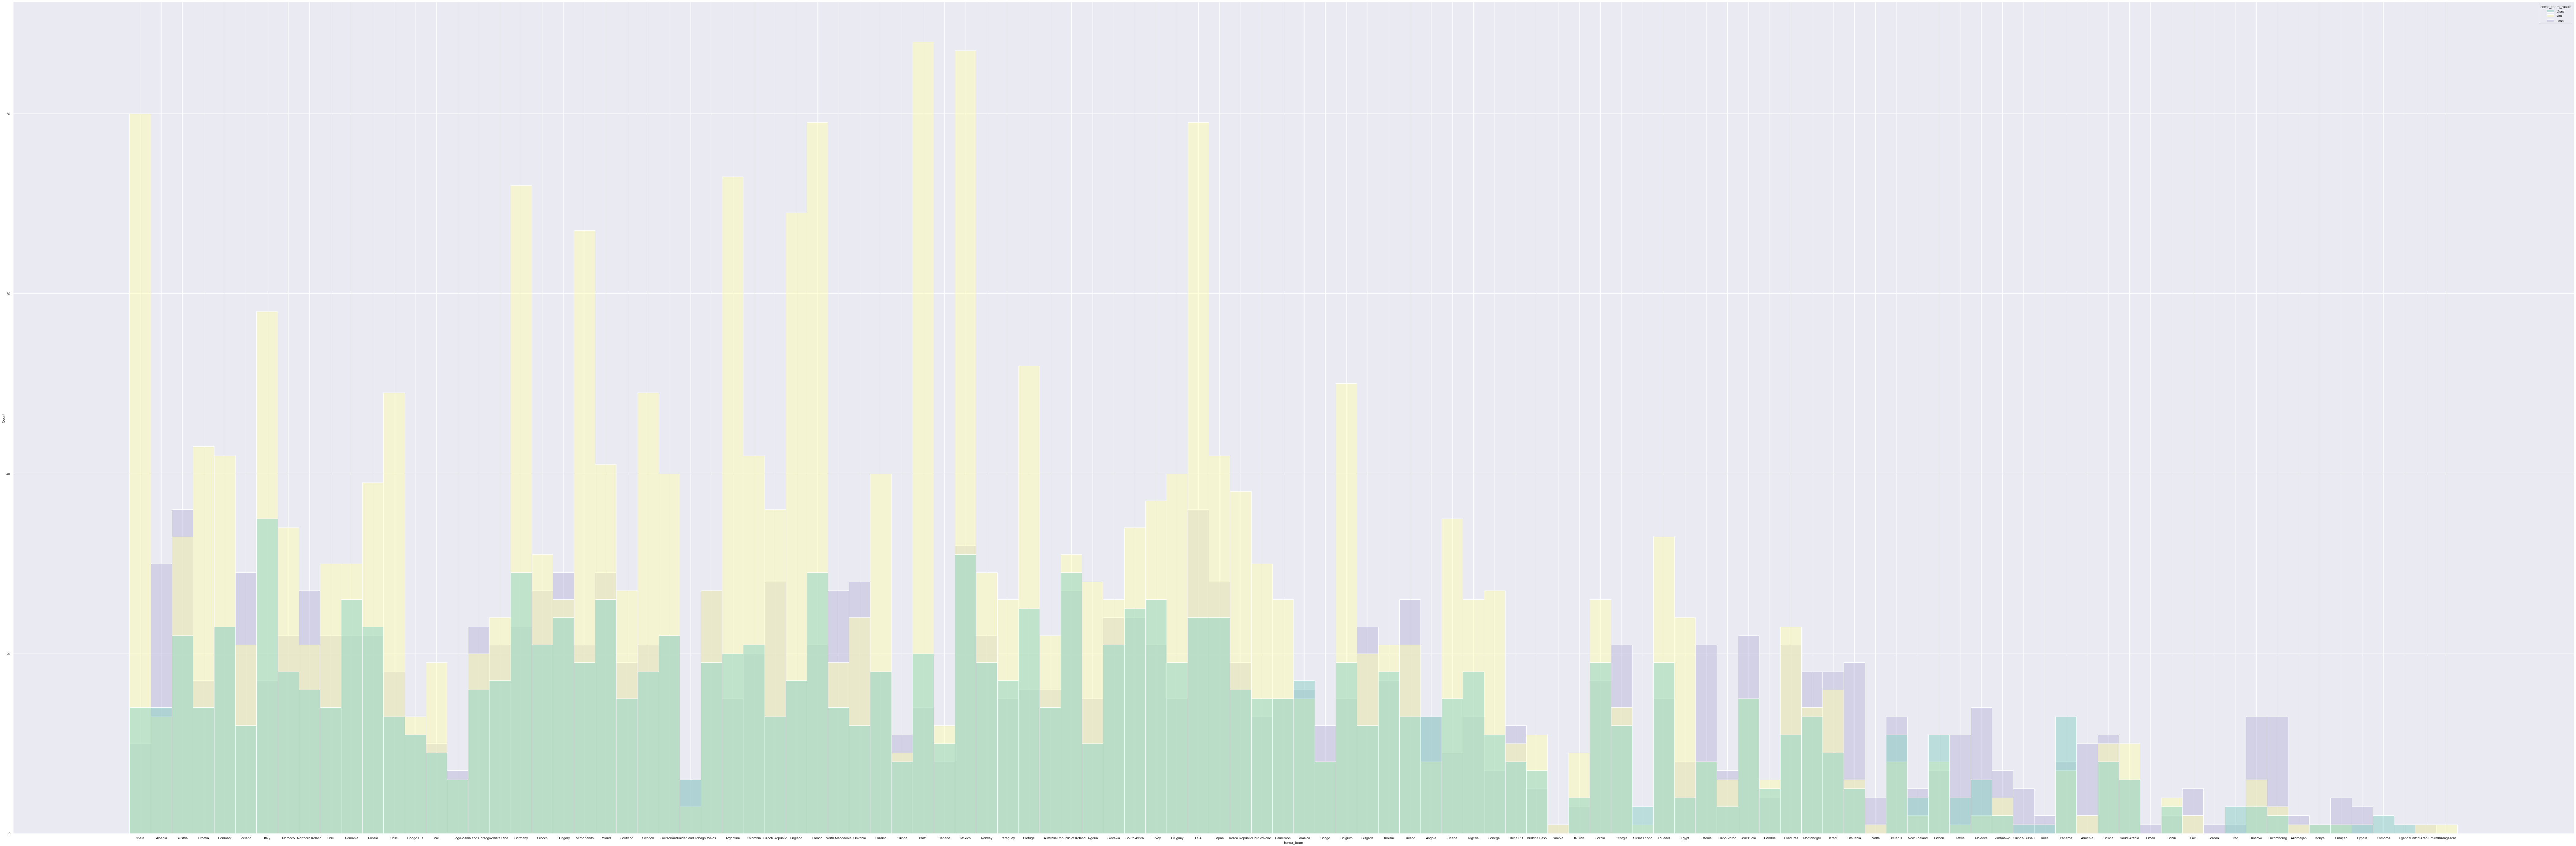

In [9]:
sns.set(rc={'figure.figsize':(150,50)})

home_team_data = data.copy()

home_team_data = home_team_data[~home_team_data['home_team'].isna()]

ax = sns.histplot(x = 'home_team', data = home_team_data, palette = 'Set3', hue = 'home_team_result', binwidth=20)

In [10]:
# changing missing values to mode and median????
#Mode would be used for strings 
#Median or mean for missing data in numerical values
strings2 =['date', 'home_team','away_team','home_team_continent', 'away_team_continent',
       'tournament', 'city' , 'country', 'neutral_location', 'shoot_out', 'home_team_result']
num2 = ['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 
       'home_team_score', 'away_team_score', 'home_team_goalkeeper_score', 
       'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 
       'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score']

#for s in strings2:
 #   mode = data[s].mode()[0]
  #  data[s]= data[s].fillna(mode)
   # raw_data_clean[s][raw_data_clean[s] == 'nan'] = mode
    
for n in num2:
    median = data[n].median()
    data[n]= data[n].fillna(median)
    # checking for nulls
data.isna().sum()


date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_mean_defense_score     0
home_team_mean_offense_score     0
home_team_mean_midfield_score    0
away_team_mean_defense_score     0
away_team_mean_offense_score     0
away_team_mean_midfield_score    0
dtype: int64

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


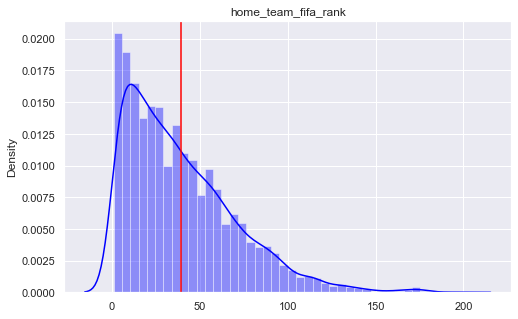

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


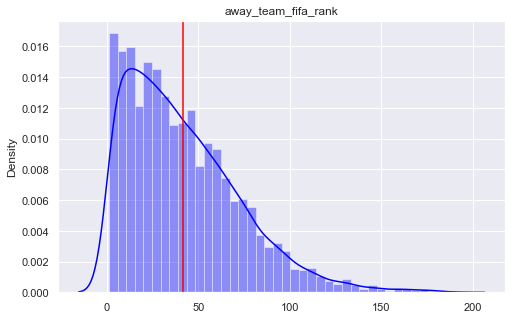

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


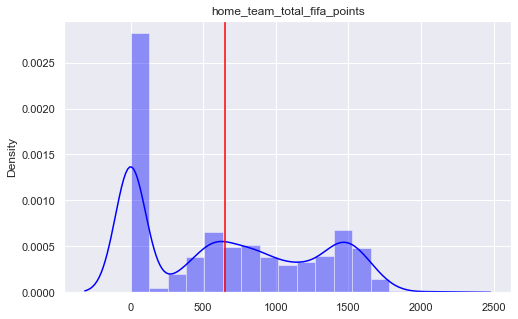

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


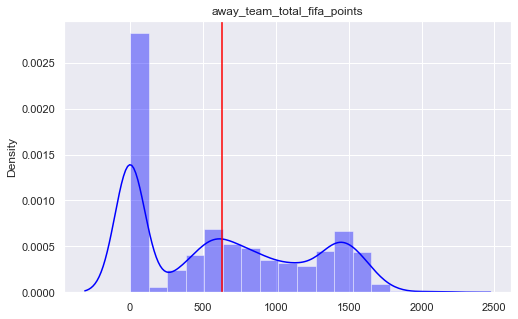

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


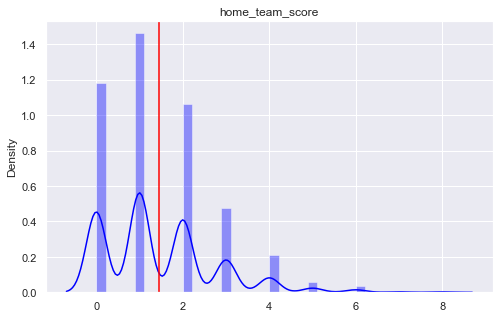

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


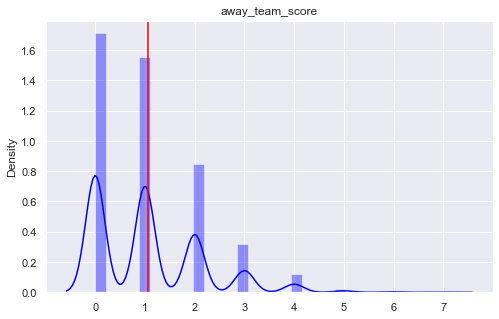

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


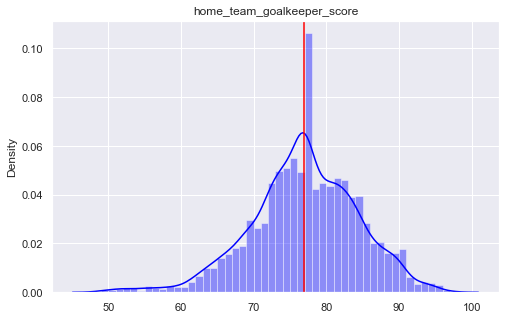

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


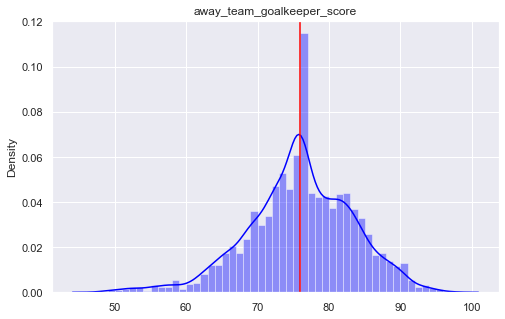

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


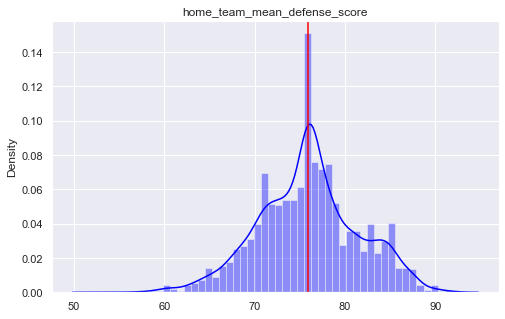

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


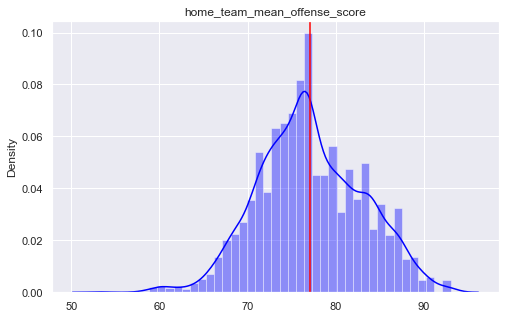

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


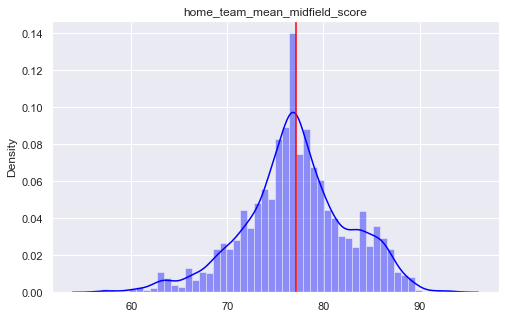

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


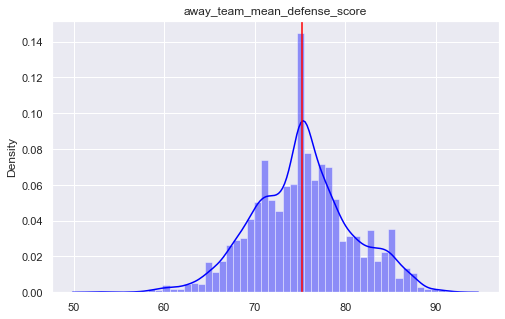

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


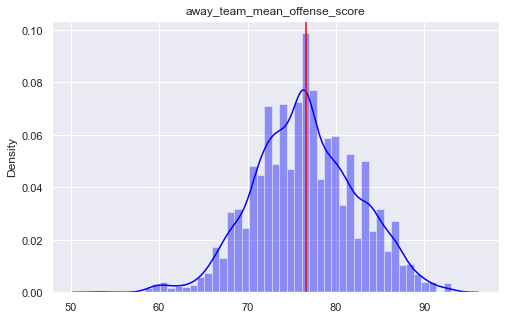

C:\Users\libby\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


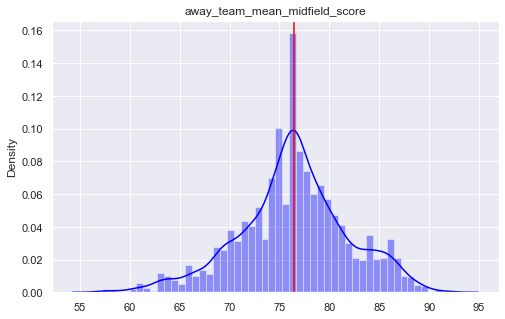

In [11]:
#Investigating distributions
sns.set(rc={'figure.figsize':(8,5)})


for n in num2:
    x = data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

home_team_fifa_rank
The meadian is:  32.0


C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


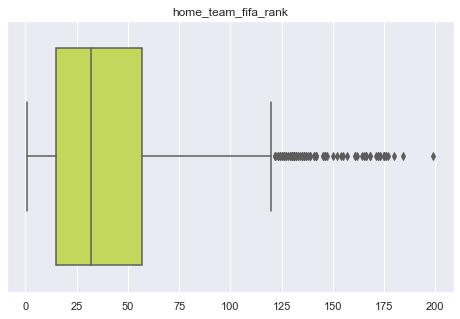

away_team_fifa_rank
The meadian is:  36.0


C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


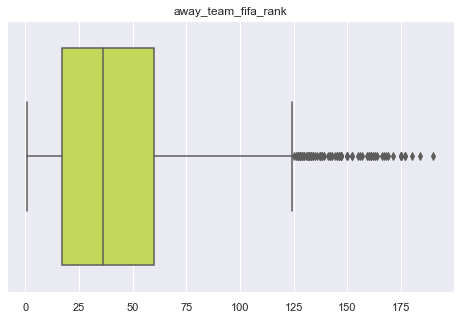

C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


home_team_total_fifa_points
The meadian is:  606.0


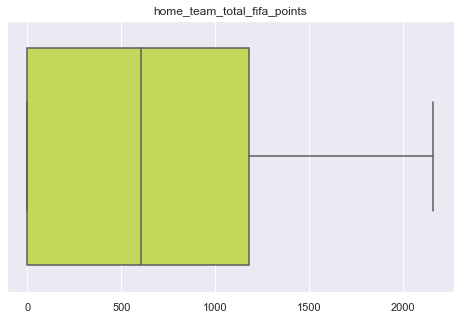

C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


away_team_total_fifa_points
The meadian is:  587.0


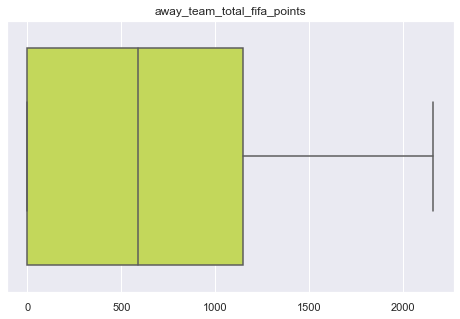

C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


home_team_score
The meadian is:  1.0


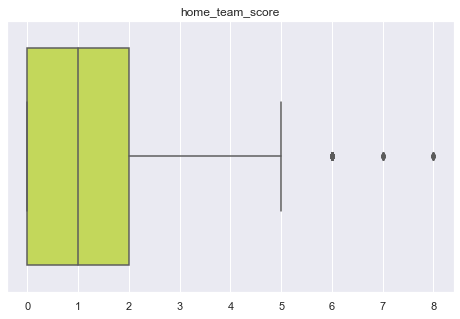

away_team_score
The meadian is:  1.0


C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


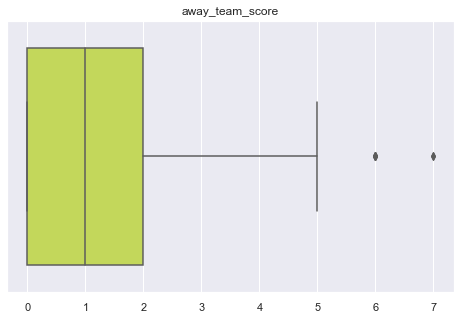

home_team_goalkeeper_score
The meadian is:  77.0


C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


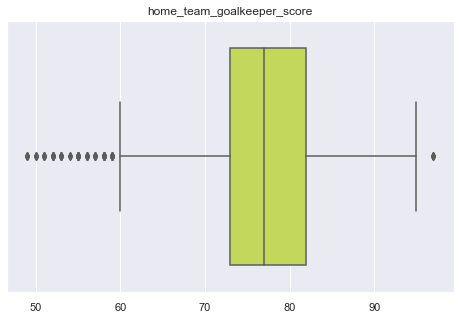

away_team_goalkeeper_score
The meadian is:  76.0


C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


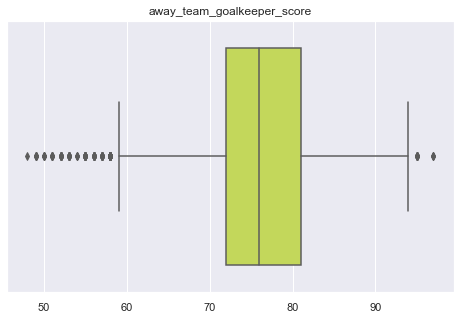

C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


home_team_mean_defense_score
The meadian is:  76.0


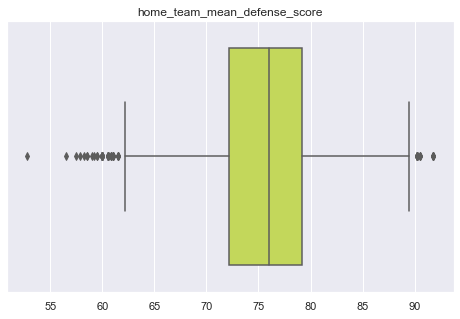

C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


home_team_mean_offense_score
The meadian is:  76.7


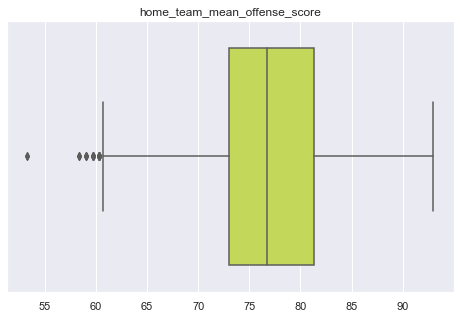

C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


home_team_mean_midfield_score
The meadian is:  77.0


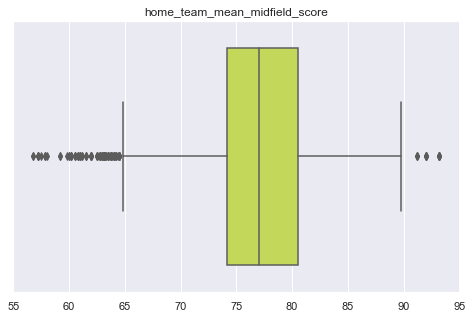

C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


away_team_mean_defense_score
The meadian is:  75.2


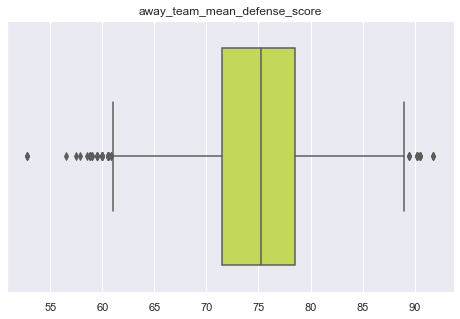

away_team_mean_offense_score
The meadian is:  76.3


C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


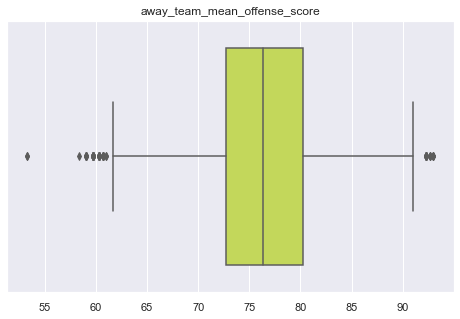

away_team_mean_midfield_score
The meadian is:  76.5


C:\Users\libby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


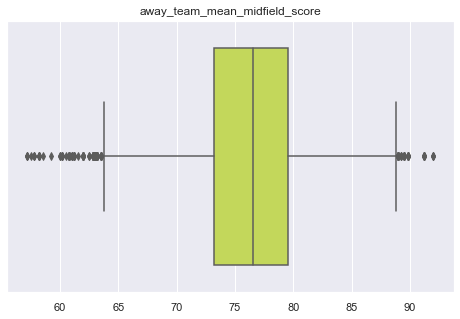

In [12]:
sns.set(rc={'figure.figsize':(8,5)})

for c in num2:
    print(c)
    x = data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', data[c].median())
    plt.title(c)
    plt.show()

In [13]:
#we do not want to delete the "outliers" - we will deal with this by scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['home_team_fifa_rank','away_team_fifa_rank','home_team_score', 'away_team_score', 'home_team_goalkeeper_score', 
       'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 
       'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score']] = scaler.fit_transform(data[['home_team_fifa_rank','away_team_fifa_rank','home_team_score', 'away_team_score', 'home_team_goalkeeper_score', 
       'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 
       'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score']])
data.head()

date home_team away_team home_team_continent away_team_continent  \
0  2004-09-03     Spain  Scotland              Europe              Europe   
1  2004-09-04   Albania    Greece              Europe              Europe   
2  2004-09-04   Austria   England              Europe              Europe   
3  2004-09-04   Croatia   Hungary              Europe              Europe   
4  2004-09-04   Denmark   Ukraine              Europe              Europe   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0             0.010101             0.349206                          0.0   
1             0.469697             0.068783                          0.0   
2             0.449495             0.031746                          0.0   
3             0.121212             0.396825                          0.0   
4             0.070707             0.455026                          0.0   

   away_team_total_fifa_points  home_team_score  ...  shoot_out  \
0                          0.0            0.125  ...         No   
1                          0.0            0.250  ...         No   
2                          0.0            0.250  ...         No   
3                          0.0            0.375  ...         No   
4                          0.0            0.125  ...         No   

  home_team_result home_team_goalkeeper_score away_team_goalkeeper_score  \
0             Draw                   0.937500                   0.734694   
1              Win                   0.583333                   0.857143   
2             Draw                   0.708333                   0.816327   
3              Win                   0.583333                   0.530612   
4             Draw                   0.687500                   0.571429   

  home_team_mean_defense_score home_team_mean_offense_score  \
0                     0.864103                     0.906801   
1                     0.594872                     0.143577   
2                     0.600000                     0.496222   
3                     0.710256                     0.639798   
4                     0.684615                     0.798489   

  home_team_mean_midfield_score  away_team_mean_defense_score  \
0                      0.898352                      0.702564   
1                      0.486264                      0.769231   
2                      0.472527                      0.966667   
3                      0.609890                      0.487179   
4                      0.678571                      0.574359   

   away_team_mean_offense_score  away_team_mean_midfield_score  
0                      0.664987                       0.706897  
1                      0.765743                       0.804598  
2                      0.891688                       0.977011  
3                      0.564232                       0.373563  
4                      0.715365                       0.247126  

[5 rows x 25 columns]

In [14]:
# turning text into numeric representation
#change!
new_data = pd.get_dummies(data, columns = ['home_team','away_team', 'shoot_out', 'neutral_location', 'tournament'])
new_data.head()

date home_team_continent away_team_continent  home_team_fifa_rank  \
0  2004-09-03              Europe              Europe             0.010101   
1  2004-09-04              Europe              Europe             0.469697   
2  2004-09-04              Europe              Europe             0.449495   
3  2004-09-04              Europe              Europe             0.121212   
4  2004-09-04              Europe              Europe             0.070707   

   away_team_fifa_rank  home_team_total_fifa_points  \
0             0.349206                          0.0   
1             0.068783                          0.0   
2             0.031746                          0.0   
3             0.396825                          0.0   
4             0.455026                          0.0   

   away_team_total_fifa_points  home_team_score  away_team_score        city  \
0                          0.0            0.125         0.142857    Valencia   
1                          0.0            0.250         0.142857      Tirana   
2                          0.0            0.250         0.285714      Vienna   
3                          0.0            0.375         0.000000      Zagreb   
4                          0.0            0.125         0.142857  Copenhagen   

   ... tournament_Kirin Cup tournament_Lunar New Year Cup  \
0  ...                    0                             0   
1  ...                    0                             0   
2  ...                    0                             0   
3  ...                    0                             0   
4  ...                    0                             0   

   tournament_Nations Cup  tournament_Nehru Cup  tournament_OSN Cup  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   0   

   tournament_Superclásico de las Américas  tournament_UEFA Euro  \
0                                        0                     0   
1                                        0                     0   
2                                        0                     0   
3                                        0                     0   
4                                        0                     0   

   tournament_UEFA Euro qualification  tournament_UEFA Nations League  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   tournament_UNCAF Cup  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 281 columns]

In [15]:
#Selecting the important features
new_data.columns

Index(['date', 'home_team_continent', 'away_team_continent',
       'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'city',
       ...
       'tournament_Kirin Cup', 'tournament_Lunar New Year Cup',
       'tournament_Nations Cup', 'tournament_Nehru Cup', 'tournament_OSN Cup',
       'tournament_Superclásico de las Américas', 'tournament_UEFA Euro',
       'tournament_UEFA Euro qualification', 'tournament_UEFA Nations League',
       'tournament_UNCAF Cup'],
      dtype='object', length=281)

In [16]:
from sklearn.tree import DecisionTreeClassifier

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Split the data into X & y

X = new_data.drop(['home_team_result','date',
                   'city' , 'country', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'away_team_continent', 
                   'home_team_continent', 'home_team_score', 'away_team_score' ], axis = 1).values
X_columns = new_data.drop(['home_team_result','date', 
                   'city' , 'country', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'away_team_continent', 
                           'home_team_continent', 'home_team_score', 'away_team_score'], axis = 1)
y = new_data['home_team_result']

print(X.shape)
print(y.shape)

# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)
# Calculating FI
for i, column in enumerate(new_data.drop(['home_team_result','date', 'city' , 'country', 'home_team_total_fifa_points', 
                                          'away_team_total_fifa_points', 'away_team_continent', 'home_team_continent',
                                         'home_team_score', 'away_team_score'], axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data

final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi



(5641, 271)
(5641,)
Importance of feature home_team_fifa_rank:, 0.090
Importance of feature away_team_fifa_rank:, 0.074
Importance of feature home_team_goalkeeper_score:, 0.041
Importance of feature away_team_goalkeeper_score:, 0.052
Importance of feature home_team_mean_defense_score:, 0.073
Importance of feature home_team_mean_offense_score:, 0.128
Importance of feature home_team_mean_midfield_score:, 0.066
Importance of feature away_team_mean_defense_score:, 0.045
Importance of feature away_team_mean_offense_score:, 0.147
Importance of feature away_team_mean_midfield_score:, 0.099
Importance of feature home_team_Albania:, 0.004
Importance of feature home_team_Algeria:, 0.001
Importance of feature home_team_Angola:, 0.004
Importance of feature home_team_Argentina:, 0.000
Importance of feature home_team_Armenia:, 0.000
Importance of feature home_team_Australia:, 0.000
Importance of feature home_team_Austria:, 0.000
Importance of feature home_team_Azerbaijan:, 0.000
Importance of featu

index                          Variable  Feature Importance Score
0        8      away_team_mean_offense_score                  0.146817
1        5      home_team_mean_offense_score                  0.128378
2        9     away_team_mean_midfield_score                  0.098937
3        0               home_team_fifa_rank                  0.090366
4        1               away_team_fifa_rank                  0.073967
..     ...                               ...                       ...
266    132                 away_team_Bolivia                  0.000000
267    133  away_team_Bosnia and Herzegovina                  0.000000
268    134                  away_team_Brazil                  0.000000
269     45                 home_team_Estonia                  0.000000
270    270              tournament_UNCAF Cup                  0.000000

[271 rows x 3 columns]

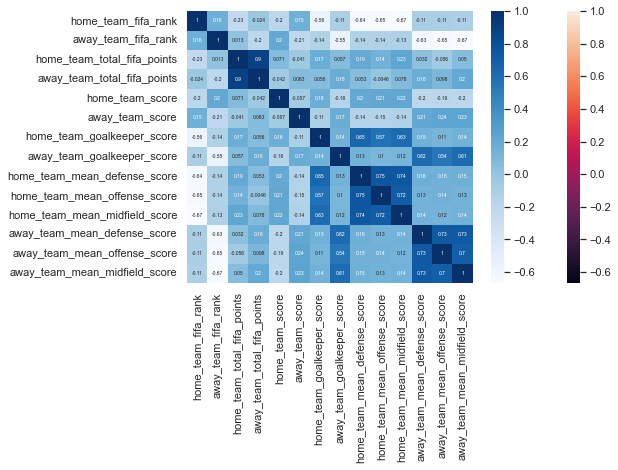

In [17]:
#compute correlations between features
corr = data.corr(method ='pearson')

from seaborn import heatmap
heatmap(corr)
ax2= sns.heatmap(corr, annot=True,
                 annot_kws={'size':5},
                 cmap="Blues")
plt.show()

In [18]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=18)

        0         1         2         3         4         5         6    \
0  0.186869  0.148148  0.520833  0.469388  0.594872  0.387909  0.357143   
1  0.404040  0.153439  0.416667  0.551020  0.420513  0.337531  0.348901   
2  0.085859  0.026455  0.729167  0.734694  0.697436  0.564232  0.637363   
3  0.353535  0.423280  0.541667  0.428571  0.676923  0.604534  0.560440   
4  0.095960  0.365079  0.562500  0.551020  0.582051  0.589421  0.505495   

        7         8         9    ...  261  262  263  264  265  266  267  268  \
0  0.589744  0.513854  0.488506  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.538462  0.589421  0.517241  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.779487  0.841310  0.755747  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.317949  0.445844  0.554598  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.471795  0.438287  0.488506  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   269  270  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

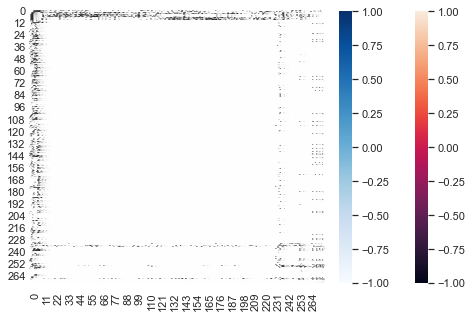

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
X_train = pd.DataFrame(X_train)
print(X_train.head())
print("\nSize: ")
print(X_train.shape)
# ax2= sns.heatmap(corr, annot=True,
#                  annot_kws={'size':5},
#                  cmap="Blues")
corr=X_train.corr(method ='pearson')
from seaborn import heatmap
heatmap(corr)
fig = sns.heatmap(corr, annot=True, annot_kws={'size':5}, cmap="Blues")

Training data shape : (4512, 271)
Projected data shape : (4512, 271)
Explained variance : 1.0000000000000002
Eigenvalues:
[4.36697183e-01 2.90481643e-01 1.53146906e-01 1.15132344e-01
 7.81598723e-02 5.97131346e-02 3.93056708e-02 3.67154849e-02
 3.38760507e-02 3.15133112e-02 2.83811526e-02 2.66675895e-02
 2.47561603e-02 2.30608814e-02 2.25864673e-02 2.20846131e-02
 2.18918011e-02 2.14502690e-02 2.04322095e-02 2.01703577e-02
 2.00181455e-02 1.96911133e-02 1.91664752e-02 1.90200395e-02
 1.87545238e-02 1.86784967e-02 1.82891760e-02 1.81120998e-02
 1.77582947e-02 1.77224706e-02 1.75573978e-02 1.73714952e-02
 1.72481547e-02 1.71021067e-02 1.68851368e-02 1.68236497e-02
 1.68002545e-02 1.65451589e-02 1.63863710e-02 1.62282161e-02
 1.60989166e-02 1.58908390e-02 1.56937949e-02 1.55559774e-02
 1.55335777e-02 1.53623859e-02 1.52686641e-02 1.51088416e-02
 1.50499622e-02 1.48635892e-02 1.47625424e-02 1.47006191e-02
 1.46352873e-02 1.45475160e-02 1.43953984e-02 1.43394841e-02
 1.42419077e-02 1.422702

Text(0, 0.5, 'Explained variance (%)')

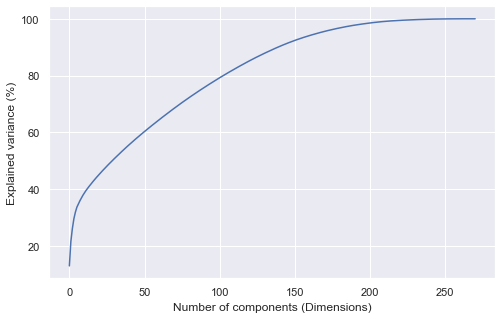

In [20]:
pca = PCA(n_components=None)
X_train2= pca.fit_transform(X_train)

print("Training data shape :", X_train.shape)
print("Projected data shape :", X_train2.shape)
print("Explained variance :", np.sum(pca.explained_variance_ratio_))
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

          0         1         2         3         4         5         6  \
0 -0.727891  0.440474 -0.398844 -0.136008  0.103534 -0.092232  0.010719   
1 -0.729227  0.461905 -0.454458 -0.257512  0.262887 -0.064034  0.015008   
2 -0.696803  0.463836 -0.280067  0.522876  0.215985 -0.085728 -0.051351   
3 -0.300746  0.065221  0.224882 -0.344332 -0.243416  0.406252  0.007479   
4 -0.298284  0.040214  0.232139 -0.231488 -0.247841  0.419307  0.058068   

          7  
0 -0.077018  
1  0.096265  
2 -0.082311  
3  0.057093  
4  0.234005  

Size: 
(4512, 8)


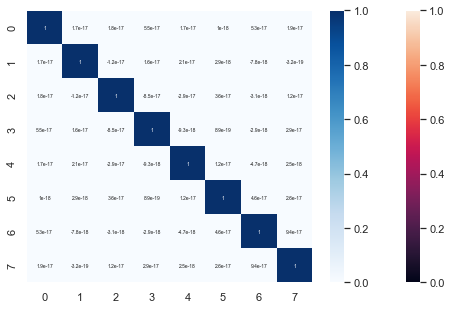

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA(n_components=8)
X_train_reduced = pca.fit_transform(X_train)
X_train_reduced = pd.DataFrame(X_train_reduced)
print(X_train_reduced.head())
print("\nSize: ")
print(X_train_reduced.shape)
# ax2= sns.heatmap(corr, annot=True,
#                  annot_kws={'size':5},
#                  cmap="Blues")
corr=X_train_reduced.corr(method ='pearson')
from seaborn import heatmap
heatmap(corr)
fig = sns.heatmap(corr, annot=True, annot_kws={'size':5}, cmap="Blues")

In [22]:
lr = LogisticRegression(solver="lbfgs")
    #solver='liblinear')
    #"lbfgs"
lr.fit(X_train, y_train)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
y_lr = lr.predict(X_test) 
print("Accuracy on test set: ", accuracy_score(y_test, y_lr))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5243578387953941
Training took 0.00s


C:\Users\libby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#TAKING THE FIRST 8 COMPONENTS
pca = PCA(n_components=8)
X_train_reduced = pca.fit_transform(X_train)
lr = LogisticRegression(solver="lbfgs")
t0 = time.time()
lr.fit(X_train_reduced, y_train)
t1 = time.time()
training_time = t1-t0
X_test_reduced = pca.transform(X_test)
y_lr_red = lr.predict(X_test_reduced)
print("Accuracy on test set: ", accuracy_score(y_test, y_lr_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5411868910540301
Training took 0.04s


In [24]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb = nb.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_nb))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.29229406554472986
Training took 0.00s


In [25]:
pca = PCA(n_components=5)
X_train_reduced = pca.fit_transform(X_train)
nb = GaussianNB()
nb.fit(X_train_reduced, y_train)
X_test_reduced = pca.transform(X_test)
y_nb_red = nb.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_nb_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5473870682019486
Training took 0.00s


In [26]:
lda = LDA()
lda.fit(X_train, y_train)
y_lda = lda.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_lda))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5155004428697962
Training took 0.00s


In [27]:
pca = PCA(n_components=9)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
lda = LDA()
lda.fit(X_train_reduced, y_train)
y_lda_red = lda.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_lda_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5429583702391497
Training took 0.00s


In [28]:
qda = QDA()
qda.fit(X_train, y_train)
y_qda = qda.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_qda))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.2657218777679362
Training took 0.00s


C:\Users\libby\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [29]:
pca = PCA(n_components=5)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
qda = QDA()
qda.fit(X_train_reduced, y_train)
y_qda_red = qda.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_qda_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.545615589016829
Training took 0.00s


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc=gbc.fit(X_train, y_train)
y_gbc = gbc.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_gbc))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.520814880425155
Training took 0.00s


In [31]:
pca = PCA(n_components=7)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc=gbc.fit(X_train_reduced, y_train)
y_gbc_red = gbc.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_gbc_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5279007971656333
Training took 0.00s


In [32]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train,y_train)
y_dtc = DTC.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_dtc))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.4304694419840567
Training took 0.00s


In [33]:
pca = PCA(n_components=5)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train_reduced,y_train)
y_dtc_red = DTC.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_dtc_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.4437555358724535
Training took 0.00s


In [34]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC=RFC.fit(X_train,y_train)
y_RFC=RFC.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_RFC))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5261293179805138
Training took 0.00s


In [35]:
pca = PCA(n_components=8)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100)
RFC=RFC.fit(X_train_reduced,y_train)
y_RFC_red=RFC.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_RFC_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5119574844995571
Training took 0.00s


In [36]:
from sklearn.svm import SVC
SVC=SVC(kernel='rbf')
SVC.fit(X_train,y_train)
y_SVC = SVC.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_SVC))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5296722763507529
Training took 0.00s


In [37]:
pca = PCA(n_components=8)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
from sklearn.svm import SVC
SVC=SVC(kernel='rbf')
SVC.fit(X_train_reduced,y_train)
y_SVC_red = SVC.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_SVC_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5394154118689105
Training took 0.00s


In [38]:
from sklearn.ensemble import AdaBoostClassifier
ADC = AdaBoostClassifier()
ADC=ADC.fit(X_train,y_train)
y_ADC = ADC.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_ADC))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5190434012400355
Training took 0.00s


In [39]:
pca = PCA(n_components=8)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
from sklearn.ensemble import AdaBoostClassifier
ADC = AdaBoostClassifier()
ADC=ADC.fit(X_train_reduced,y_train)
y_ADC_red = ADC.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_ADC_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5403011514614703
Training took 0.00s


In [40]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(alpha=1E-5, max_iter=1000000)
#MLPClassifier(solver='lbfgs', alpha=1e-5,
 #   hidden_layer_sizes=(5, 2), random_state=1)
MLP=MLP.fit(X_train,y_train)
y_MLP = MLP.predict(X_test)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_MLP))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.47475642161204606
Training took 0.00s


In [41]:
pca = PCA(n_components=8)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(alpha=1E-5, max_iter=1000000)
#MLPClassifier(solver='lbfgs', alpha=1e-5,
 #   hidden_layer_sizes=(5, 2), random_state=1)
MLP=MLP.fit(X_train_reduced,y_train)
y_MLP_red = MLP.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_MLP_red))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5394154118689105
Training took 0.00s


In [42]:
#test_data = pd.read_csv("test1.csv")
#X_test = test_data.drop(['date'], axis = 1).values
#lr = LogisticRegression(solver='liblinear')
#lr.fit(X_train, y_train)
#y_lr = lr.predict(X_test)
#evaluation_data = pd.read_csv("test1.csv")
#evaluation_data['home_team_result'] = y_lr

#output = evaluation_data[['away_team','home_team_result']]

In [43]:
results = dict(zip(['logistic regression', 'naive bayes', 'LDA', 
               'QDA', 'GBC', 'DTC', 'RFC', 'SVC', 'ADC', 'MLP'],
              [y_lr, y_nb, y_lda, y_qda,y_gbc , y_dtc, y_RFC, y_SVC, y_ADC, y_MLP]))

# create a dictionary variable with keys being algorithm names and values being classification accuracy
accuracy = {}
for algorithm, prediction in results.items():
    accuracy[algorithm] = accuracy_score(y_test, prediction)
    
accuracy = pd.DataFrame(data=accuracy, index=[0])
accuracy



logistic regression  naive bayes     LDA       QDA       GBC       DTC  \
0             0.524358     0.292294  0.5155  0.265722  0.520815  0.430469   

        RFC       SVC       ADC       MLP  
0  0.526129  0.529672  0.519043  0.474756

In [44]:
#After applying dimensional reduction 
#dimension reduction is applied mainly to reduce computational load (but accuracy may be affected?)
results = dict(zip(['logistic regression', 'naive bayes', 'LDA', 
               'QDA', 'GBC', 'DTC', 'RFC', 'SVC', 'ADC', 'MLP'],
            [y_lr_red, y_nb_red, y_lda_red, y_qda_red,y_gbc_red , y_dtc_red, y_RFC_red, y_SVC_red, y_ADC_red, y_MLP_red]))

# create a dictionary variable with keys being algorithm names and values being classification accuracy
accuracy = {}
for algorithm, prediction in results.items():
    accuracy[algorithm] = accuracy_score(y_test, prediction)
    
accuracy = pd.DataFrame(data=accuracy, index=[0])
accuracy

logistic regression  naive bayes       LDA       QDA       GBC       DTC  \
0             0.541187     0.547387  0.542958  0.545616  0.527901  0.443756   

        RFC       SVC       ADC       MLP  
0  0.511957  0.539415  0.540301  0.539415

Below is the LDA Dimensional analysis method- code attempt for logistic regression as a start

In [45]:
lr = LogisticRegression(solver="lbfgs")
    #solver='liblinear')
    #"lbfgs"
lr.fit(X_train, y_train)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
y_lr = lr.predict(X_test) 
print("Accuracy on test set: ", accuracy_score(y_test, y_lr))
print("Training took {:.2f}s".format(training_time))

Accuracy on test set:  0.5243578387953941
Training took 0.00s


C:\Users\libby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
#All code Adapted from https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b and the lectures
#LDA as a dimensionality reduction technique
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train = pd.DataFrame(X_train)

lda = LinearDiscriminantAnalysis(n_components=1, solver='svd')
X_train_reduced_lda = lda.fit_transform(X_train, y_train)

lr = LogisticRegression(solver="lbfgs")
t0 = time.time()
lr.fit(X_train_reduced_lda, y_train)
t1 = time.time()
training_time = t1-t0
X_test_reduced = lda.transform(X_test)
y_lr_red = lr.predict(X_test_reduced)
print("Accuracy on test set lda: ", accuracy_score(y_test, y_lr_red))
print("Training took {:.2f}s".format(training_time))

#Truncated SVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1, algorithm='randomized',
                   random_state=0)
X_train_reduced_svd = svd.fit_transform(X_train, y_train)

#X_train_reduced = pca.fit_transform(X_train)
lr = LogisticRegression(solver="lbfgs")
t0 = time.time()
lr.fit(X_train_reduced_svd, y_train)
t1 = time.time()
training_time = t1-t0
X_test_reduced = svd.transform(X_test)
y_lr_red = lr.predict(X_test_reduced)
print("Accuracy on test set: ", accuracy_score(y_test, y_lr_red))
print("Training took {:.2f}s".format(training_time))

#Trying now with the Kernal pca DAR method

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_train_reduced_kpca = kpca.fit_transform(X_train, y_train)

lr = LogisticRegression(solver="lbfgs")
t0 = time.time()
lr.fit(X_train_reduced_kpca, y_train)
t1 = time.time()
training_time = t1-t0
X_test_reduced = kpca.transform(X_test)
y_lr_red = lr.predict(X_test_reduced)
print("Accuracy on test set: ", accuracy_score(y_test, y_lr_red))
print("Training took {:.2f}s".format(training_time))


Accuracy on test set lda:  0.5323294951284322
Training took 0.02s
Accuracy on test set:  0.4720992028343667
Training took 0.03s
Accuracy on test set:  0.47032772364924713
Training took 0.05s


In [57]:
#LDA for NB 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train = pd.DataFrame(X_train)

lda = LinearDiscriminantAnalysis(n_components=1, solver='svd')
X_train_reduced_lda = lda.fit_transform(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train_reduced_lda, y_train)
X_test_reduced = lda.transform(X_test)
y_nb_red = nb.predict(X_test_reduced)
t0 = time.time()
t1 = time.time()
training_time = t1-t0
print("Accuracy on test set: ", accuracy_score(y_test, y_nb_red))
print("Training took {:.2f}s".format(training_time))



Accuracy on test set:  0.5279007971656333
Training took 0.00s


In [47]:
#TRUNCATED SVD FOR LOGISTIC REGRESSION
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
from sklearn.tree import DecisionTreeClassifier

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Split the data into X & y

X = new_data.drop(['home_team_result','date',
                   'city' , 'country', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'away_team_continent', 
                   'home_team_continent', 'home_team_score', 'away_team_score' ], axis = 1).values
X_columns = new_data.drop(['home_team_result','date', 
                   'city' , 'country', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'away_team_continent', 
                           'home_team_continent', 'home_team_score', 'away_team_score'], axis = 1)
y = new_data['home_team_result']

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=8)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.10f (%.10f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.5471833093 (0.0180776314)


In [48]:
#TRUNCATED SVD FOR NAIVE BAYES
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
from sklearn.tree import DecisionTreeClassifier

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Split the data into X & y

X = new_data.drop(['home_team_result','date',
                   'city' , 'country', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'away_team_continent', 
                   'home_team_continent', 'home_team_score', 'away_team_score' ], axis = 1).values
X_columns = new_data.drop(['home_team_result','date', 
                   'city' , 'country', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'away_team_continent', 
                           'home_team_continent', 'home_team_score', 'away_team_score'], axis = 1)
y = new_data['home_team_result']

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=6)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Accuracy: 0.549 (0.019)


In [49]:
#TRUNCATED SVD FOR LDA
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=8)), ('m', LDA())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.549 (0.019)


In [50]:
#TRUNCATED SVD FOR QDA
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=6)), ('m', QDA())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.528 (0.022)


In [51]:
#TRUNCATED SVD FOR GBC
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=7)), ('m', GradientBoostingClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.541 (0.017)


In [52]:
#TRUNCATED SVD FOR DTC
# deleting for rerun

# define the pipeline
#hmmmmm investigate as when i rerun with the number of components the same the accuracy changes!!!!!!!!!!!!!!!!!!!!!
steps = [('svd', TruncatedSVD(n_components=9)), ('m', DecisionTreeClassifier())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.433 (0.020)


In [53]:
#LDA

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.10f (%.10f)' % (mean(n_scores), std(n_scores)))

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy:%.10f (%.10f)' % (mean(n_scores), std(n_scores)))

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LDA())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.10f (%.10f)' % (mean(n_scores), std(n_scores)))

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', QDA())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', GradientBoostingClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', DecisionTreeClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', RandomForestClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

from sklearn.svm import SVC
#SVC=SVC(kernel='rbf')
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', SVC())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', AdaBoostClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

from sklearn.neural_network import MLPClassifier
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', MLPClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.5445242578 (0.0153637817)
Accuracy:0.5438150380 (0.0156797755)
Accuracy: 0.5444060545 (0.0155473789)
Accuracy: 0.544 (0.016)
Accuracy: 0.536 (0.013)
Accuracy: 0.437 (0.020)
Accuracy: 0.437 (0.020)
Accuracy: 0.544 (0.015)
Accuracy: 0.535 (0.020)
Accuracy: 0.544 (0.015)
